# This notebook presents several ideas of a technical approach to conducting stock price analysis.

## Imports and setup

In [357]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

In [359]:
start = datetime(2019, 1, 1)
end = datetime.today()

Let's select a few NYSE tickers in the form of a dictionary, which will be loaded into yfinance.

In [360]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [361]:
df = yf.download(tickers, start, end, group_by='ticker')

[*********************100%%**********************]  6 of 6 completed


In [362]:
df.tail()

Ticker              GS                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2024-05-06  441.750000  444.380005  439.679993  443.670013  443.670013   
2024-05-07  445.170013  447.420013  442.869995  443.799988  443.799988   
2024-05-08  442.799988  448.019989  442.049988  446.950012  446.950012   
2024-05-09  446.339996  456.429993  446.339996  455.559998  455.559998   
2024-05-10  456.519989  458.750000  454.320007  454.730011  454.730011   

Ticker                       C                                   ...  \
Price        Volume       Open       High        Low      Close  ...   
Date                                                             ...   
2024-05-06  1914300  62.060001  62.939999  61.720001  62.810001  ...   
2024-05-07  2058200  62.820000  63.160000  61.970001  62.000000  ...   
2024-05-08  2006700  61.639999  62.950001  61.509998  62.750000  ...   
2024-05-09  2710200  62.380001  63.430000  62.290001  63.320000  ...   
2024-05-10  1818874  63.580002  63.919998  63.119999  63.529999  ...   

Ticker            WFC                                         JPM              \
Price             Low      Close  Adj Close    Volume        Open        High   
Date                                                                            
2024-05-06  59.840000  60.189999  60.189999  16240100  191.729996  192.199997   
2024-05-07  60.060001  60.259998  60.259998  16268200  191.699997  192.929993   
2024-05-08  60.099998  61.230000  61.230000  18718400  191.000000  196.649994   
2024-05-09  60.480000  61.279999  61.279999  14224300  195.169998  197.589996   
2024-05-10  61.459999  61.889999  61.889999  14420087  198.539993  199.339905   

Ticker                                                   
Price              Low       Close   Adj Close   Volume  
Date                                                     
2024-05-06  189.820007  192.000000  192.000000  7911100  
2024-05-07  191.649994  191.750000  191.750000  7688800  
2024-05-08  191.000000  195.649994  195.649994  9227600  
2024-05-09  195.100006  197.500000  197.500000  7977300  
2024-05-10  198.270004  198.770004  198.770004  7497943  

[5 rows x 36 columns]

In [363]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1349 entries, 2019-01-02 to 2024-05-10
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (GS, Open)        1349 non-null   float64
 1   (GS, High)        1349 non-null   float64
 2   (GS, Low)         1349 non-null   float64
 3   (GS, Close)       1349 non-null   float64
 4   (GS, Adj Close)   1349 non-null   float64
 5   (GS, Volume)      1349 non-null   int64  
 6   (C, Open)         1349 non-null   float64
 7   (C, High)         1349 non-null   float64
 8   (C, Low)          1349 non-null   float64
 9   (C, Close)        1349 non-null   float64
 10  (C, Adj Close)    1349 non-null   float64
 11  (C, Volume)       1349 non-null   int64  
 12  (BAC, Open)       1349 non-null   float64
 13  (BAC, High)       1349 non-null   float64
 14  (BAC, Low)        1349 non-null   float64
 15  (BAC, Close)      1349 non-null   float64
 16  (BAC, Adj Close)  1349 n

# Explanatory data analysis

Let's remove unwanted columns and check the maximum historical price of the selected stocks.

In [364]:
df.xs(key='Close', axis='columns', level='Price').max()

Ticker
GS     455.559998
C       81.910004
BAC     49.380001
MS     108.730003
WFC     61.889999
JPM    200.300003
dtype: float64

In [365]:
dfClose = df.xs(key='Close', axis='columns', level='Price')
dfClose.tail()

Ticker,GS,C,BAC,MS,WFC,JPM
Date,,,,,,
2024-05-06,443.670013,62.810001,37.689999,94.790001,60.189999,192.000000
2024-05-07,443.799988,62.000000,37.840000,95.790001,60.259998,191.750000
2024-05-08,446.950012,62.750000,37.709999,95.639999,61.230000,195.649994
2024-05-09,455.559998,63.320000,38.279999,98.110001,61.279999,197.500000
2024-05-10,454.730011,63.529999,38.450001,98.279999,61.889999,198.770004


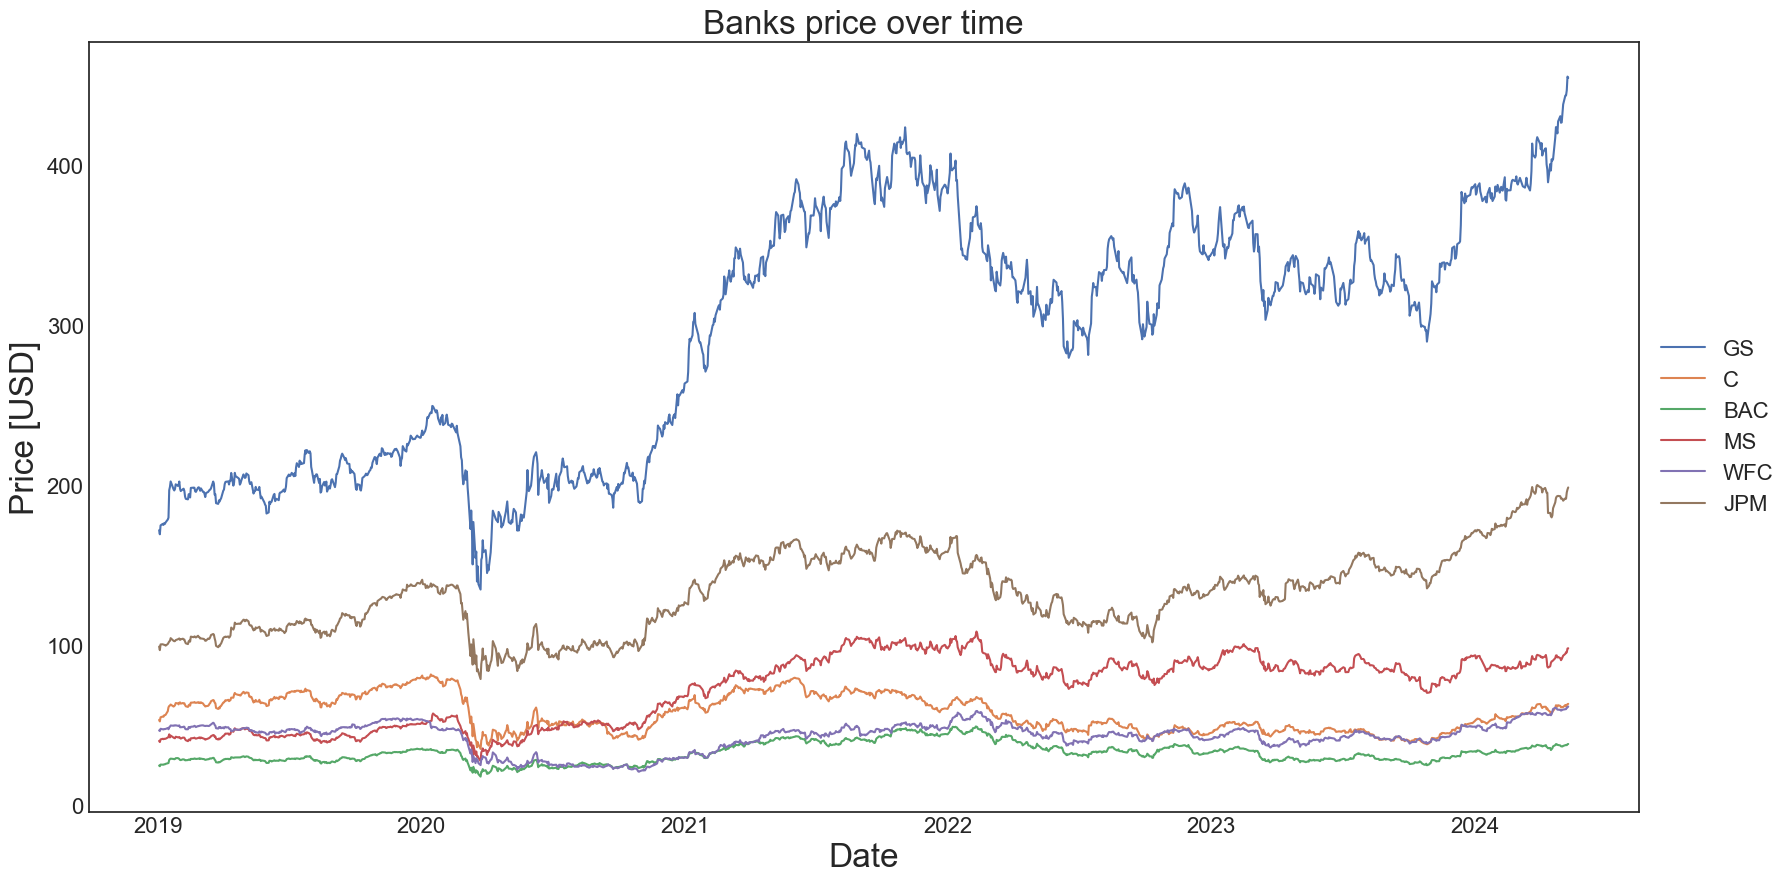

In [366]:
fig, axes = plt.subplots(figsize=(20,10))

axes.plot(dfClose)
axes.set_xlabel('Date', fontsize=24)
axes.set_ylabel('Price [USD]', fontsize=24)
axes.set_title('Banks price over time', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(labels=dfClose.columns, loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=16)

plt.show()

In [367]:
dfReturns = df.xs(key='Close', axis='columns', level='Price').pct_change()

dfReturnsColNames = {
    'GS': 'GS Return',
    'WFC': 'WFC Return',
    'MS': 'MS Return',
    'C': 'C Return',
    'BAC': 'BAC Return',
    'JPM': 'JPM Return'
}

dfReturns.rename(columns=dfReturnsColNames, inplace=True)

In [368]:
dfReturns.fillna(0, inplace=True)
dfReturns.iloc[:2]

Ticker,GS Return,C Return,BAC Return,MS Return,WFC Return,JPM Return
Date,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.014649,-0.018121,-0.016026,-0.017822,-0.007882,-0.022153


In [369]:
dfReturns.iloc[-2:]

Ticker,GS Return,C Return,BAC Return,MS Return,WFC Return,JPM Return
Date,,,,,,
2024-05-09,0.019264,0.009084,0.015115,0.025826,0.000817,0.009456
2024-05-10,-0.001822,0.003316,0.004441,0.001733,0.009954,0.006430


<Axes: ylabel='Frequency'>

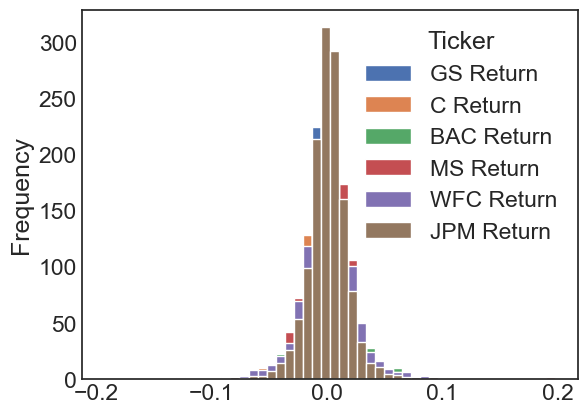

In [370]:
dfReturns.plot.hist(bins=50)

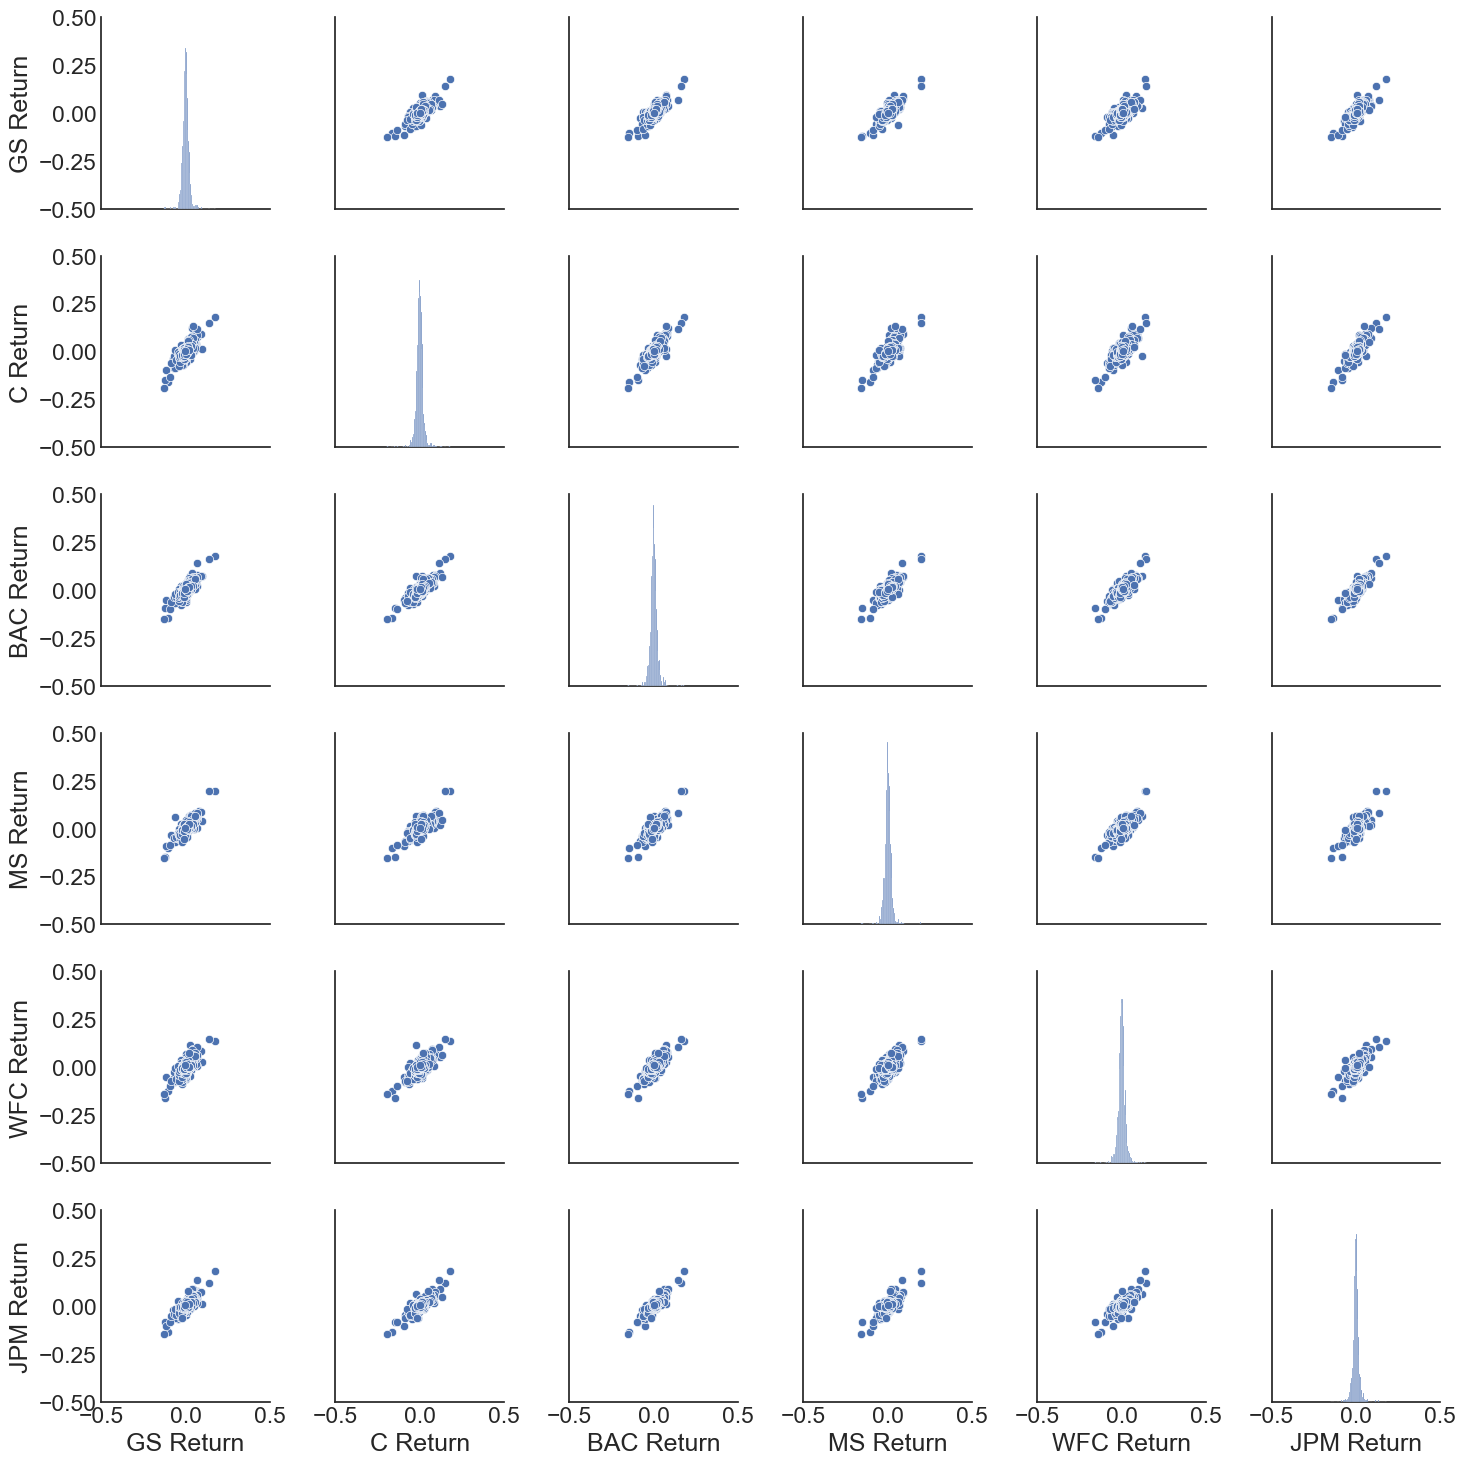

In [371]:
pairPlot = sns.pairplot(dfReturns[1:])
pairPlot.set(xlim=(-0.5,0.5))
pairPlot.set(ylim=(-0.5,0.5))
plt.tight_layout()

Let's check, when was the biggest dropdown.

In [372]:
dfReturns.idxmin()

Ticker
GS Return    2020-03-16
C Return     2020-03-16
BAC Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
JPM Return   2020-03-16
dtype: datetime64[ns]

If we were to consider adding these stocks to our portfolio, then according to the Modern Portfolio Theory by Markowitz, it would be necessary to adjust the amount of stocks in the portfolio due to volatility – in this case, the appropriate measure is the standard deviation. To make a long story short, we should proportionally add fewer of the stocks with the highest standard deviation to the portfolio than those with lower volatility.

In [373]:
dfClose.std()

Ticker
GS     76.794177
C      11.289092
BAC     6.346141
MS     21.470878
WFC     8.848163
JPM    25.438439
dtype: float64

Regardless of local price volatility, the daily dispersion of returns is similar for all positions.

In [374]:
dfReturns.std()

Ticker
GS Return     0.020210
C Return      0.023976
BAC Return    0.022042
MS Return     0.021793
WFC Return    0.023374
JPM Return    0.019653
dtype: float64

<Axes: xlabel='GS Return', ylabel='Count'>

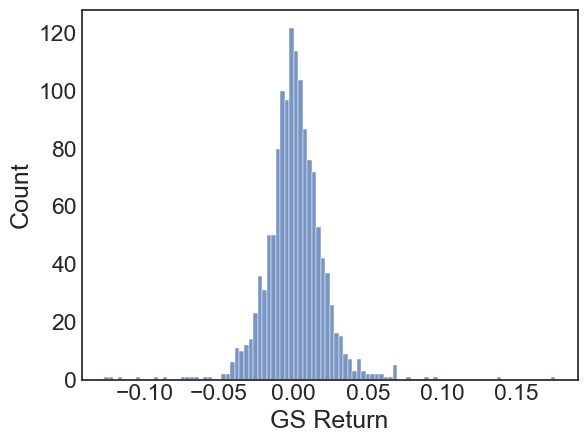

In [375]:
sns.histplot(dfReturns['GS Return'], bins=100)

<Axes: xlabel='C Return', ylabel='Count'>

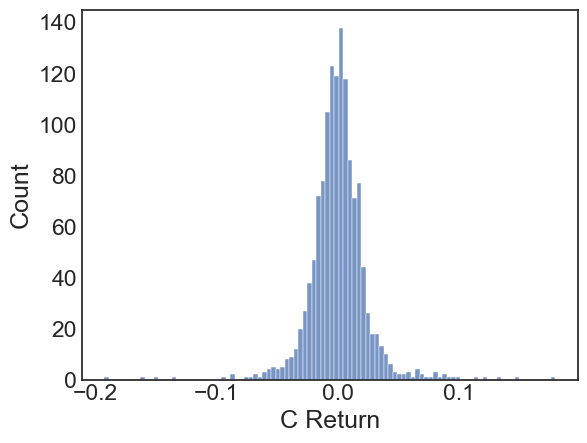

In [376]:
sns.histplot(dfReturns['C Return'], bins=100)

Let's examine the correlation between individual stocks. It is obvious that within the same sector, stocks must be correlated, but is it evenly so?

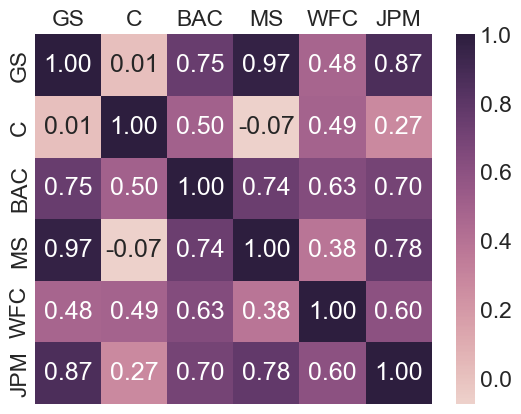

In [377]:
ht = sns.heatmap(dfClose.corr(), annot=True, fmt='.2f', cmap=sns.cubehelix_palette(as_cmap=True))
ht.set(xlabel="", ylabel="")
ht.xaxis.tick_top()

Graphically, it doesn't look the best. A good idea would be to use hierarchical clustering. It clearly shows which assets have the highest correlation. Due to the high positive correlation, the stocks in question should have their target weights in the portfolio reduced.

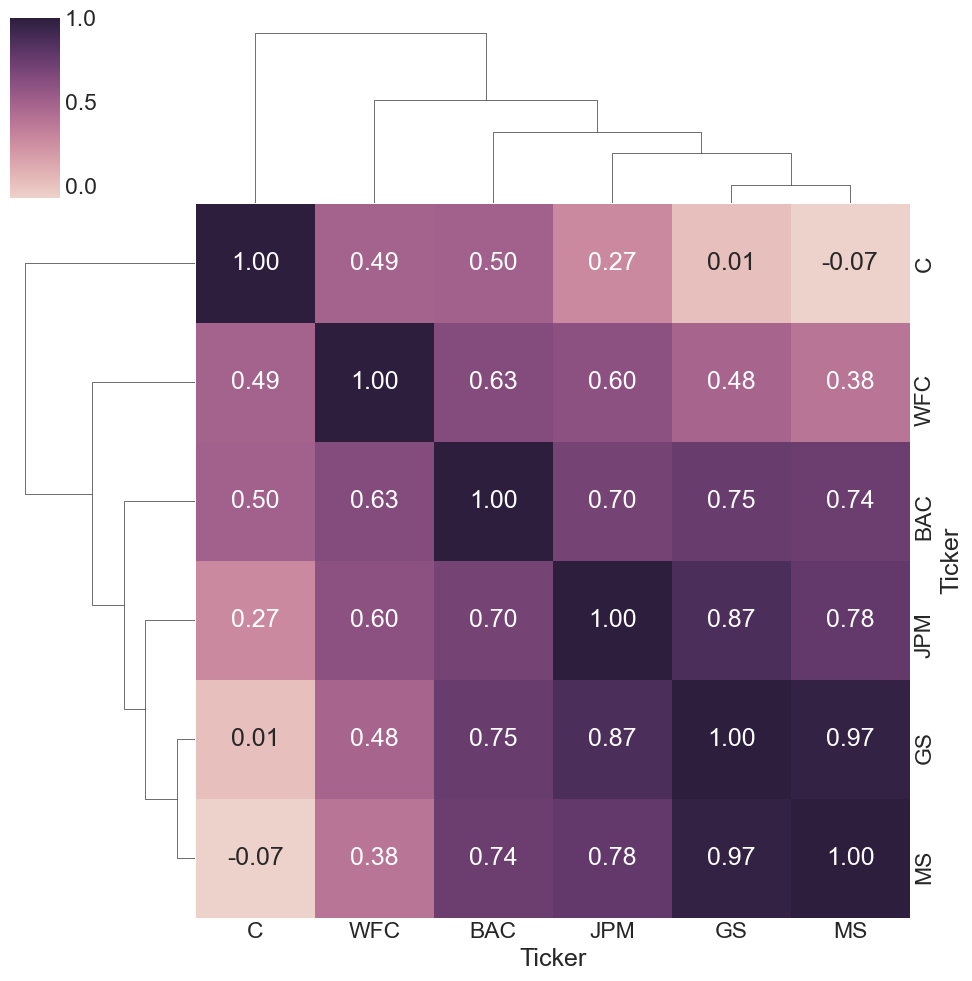

In [378]:
cm = sns.clustermap(dfClose.corr(), annot=True, fmt='.2f', cmap=sns.cubehelix_palette(as_cmap=True))

# Volatility
Volatility 
$$volatility = \sigma_{\text{minPeriods}} \times \sqrt{minPeriods}$$

is an indicator of market risk. The higher it is, the riskier it is to stay in the market.
We can clearly observe a radical jump in volatility during the 2020 pandemic.

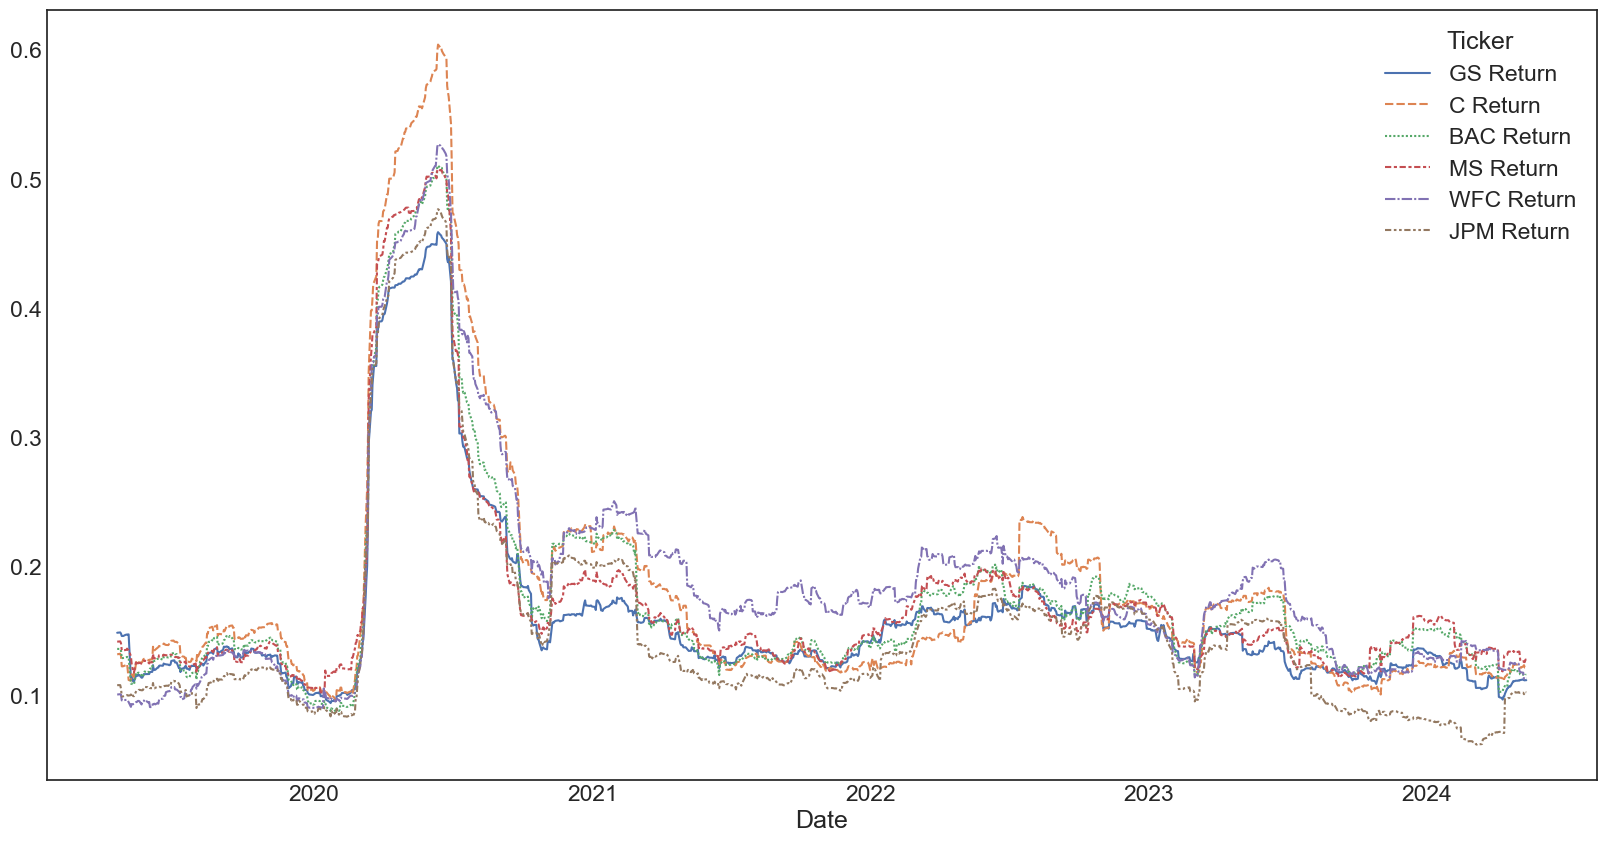

In [379]:
minPeriods = 75

vol = dfReturns.rolling(minPeriods).std() * np.sqrt(minPeriods)

plt.figure(figsize=(20,10))
sns.lineplot(vol)
sns.set(font_scale=1.5)

plt.show()

# Simple moving average analysis

Let's check how the theory of signals generated by two moving averages with different and arbitrarily chosen steps behaves in practice.

First, we need to establish the time steps for the moving averages - the shorter and the longer one - that is, from how many days the moving average will be calculated.

The most popular lengths in long-term trading are 50 and 200.

In [380]:
shortWindow = 50
shortWindowLabel = 'SMA{}'.format(shortWindow)
longWindow = 200
longWindowLabel = 'SMA{}'.format(longWindow)

## Buy/Sell signals - points where short SMA crosses long from bottom-up or up-bottom

In the practical application of two moving averages, we are interested in the signals generated by the crossing of the averages. When the average with the shorter step becomes larger than the longer one, we have a buy signal - the market's cumulative demand is greater than the long-term trend. The opposite situation occurs when the shorter average becomes smaller than the longer one - we receive a sell signal.

Buy = 1, Sell = -1, Hold = 0

In [381]:
dfCloseSMA = dfClose.copy()
dfCloseSMA['Date'] = dfCloseSMA.index

dfCloseSMA['JPMsignalMark'] = 0

dfCloseSMA['smaShort'] = dfCloseSMA['JPM'].rolling(window=shortWindow, min_periods=1).mean()
dfCloseSMA['smaLong'] = dfCloseSMA['JPM'].rolling(window=longWindow, min_periods=1).mean()

# NumPy.where(): if True return 1 or -1; if False return 0
# Find the periods in which the short average is greater than the long one.

dfCloseSMA['JPMsignalMark'] = np.where(dfCloseSMA['smaShort'] > dfCloseSMA['smaLong'], 1, 0)

# NumPy.diff(): the first difference is given by out[i] = a[i+1] - a[i] along the given axis
# Find a trading signal

dfCloseSMA['JPMsignalMark'] = dfCloseSMA['JPMsignalMark'].diff()


Mark Buy/Sell has been established for variable -1/1 (SMAs crossover point), but it's linked to the actual price, highlighting that this technique generates a delay not only in time but also in price.

First iteration of simple moving analysis technique.

In [382]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [383]:
plt.style.use('seaborn-v0_8-white')

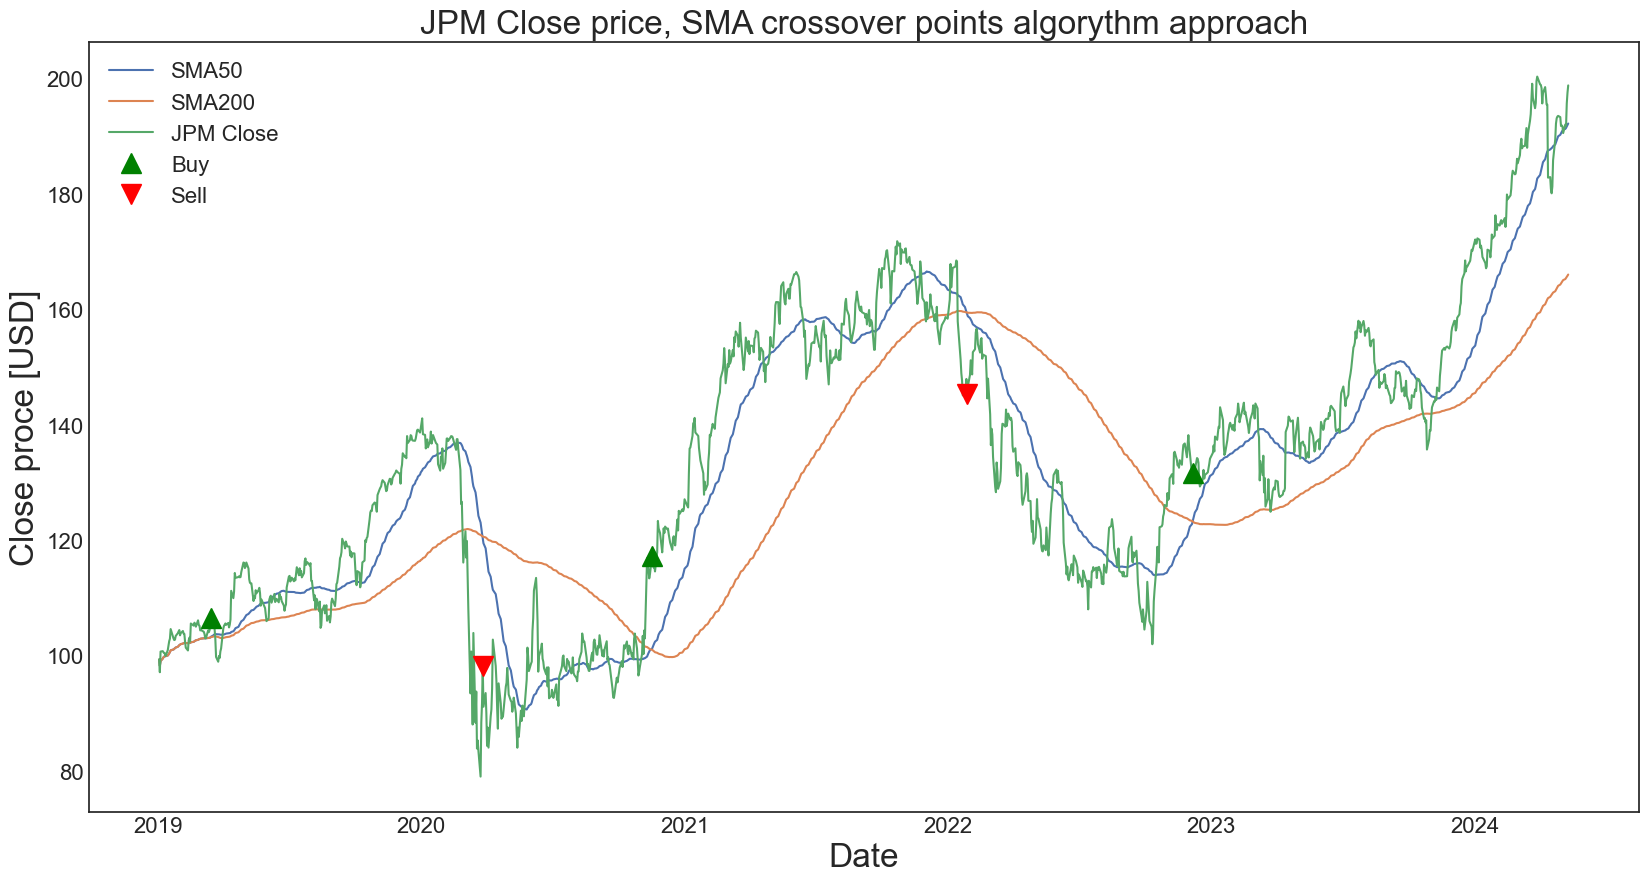

Ticker,GS,C,BAC,MS,WFC,JPM,Date,JPMsignalMark,smaShort,smaLong
Date,,,,,,,,,,
2019-03-15,198.259995,65.190002,29.299999,43.330002,50.660000,106.550003,2019-03-15,1.0,103.269200,103.191569
2020-03-26,165.789993,46.020000,22.719999,35.709999,30.900000,98.120003,2020-03-26,-1.0,120.359200,120.644200
2020-11-16,222.380005,50.400002,27.580000,58.110001,24.900000,117.300003,2020-11-16,1.0,101.206000,101.005950
2022-01-27,341.029999,64.150002,45.470001,101.150002,53.759998,145.309998,2022-01-27,-1.0,159.156801,159.419850
2022-12-06,362.910004,44.980000,33.000000,87.510002,43.400002,131.589996,2022-12-06,1.0,123.259999,123.222800


In [384]:
plt.figure(figsize=(20,10))

plt.plot(dfCloseSMA.index, dfCloseSMA['smaShort'],label=shortWindowLabel)
plt.plot(dfCloseSMA.index, dfCloseSMA['smaLong'],label=longWindowLabel)
plt.plot(dfCloseSMA.index, dfCloseSMA['JPM'],label='JPM Close')

plt.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
plt.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

plt.title('JPM Close price, SMA crossover points algorythm approach', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close price [USD]', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(loc='upper left', fontsize='16')
plt.show()

# Transactions list
(dfCloseSMA.loc[(dfCloseSMA['JPMsignalMark'] == 1) | (dfCloseSMA['JPMsignalMark'] == -1)])


## Counting total return from hypothetical investment

In [465]:
initialCapital = 10000 # USD

dfCloseSMA['DailyReturns'] = dfCloseSMA['JPM'].pct_change()
dfCloseSMA['OnMarket'] = 0
dfCloseSMA.loc[dfCloseSMA['smaShort'] > dfCloseSMA['smaLong'], 'OnMarket'] = 1

dfCloseSMA['OnMarketReturns'] = dfCloseSMA['DailyReturns'] * dfCloseSMA['OnMarket'].shift(1) # Transaction is set the day after signal
dfCloseSMA['CumulativeProfit'] = (1 + dfCloseSMA['OnMarketReturns']).cumprod() * initialCapital
dfCloseSMA['StrategyCumulative'] = (1 + dfCloseSMA['OnMarketReturns']).cumprod() * dfCloseSMA['JPM'].iloc[0]

dfCloseSMA.bfill(inplace=True)


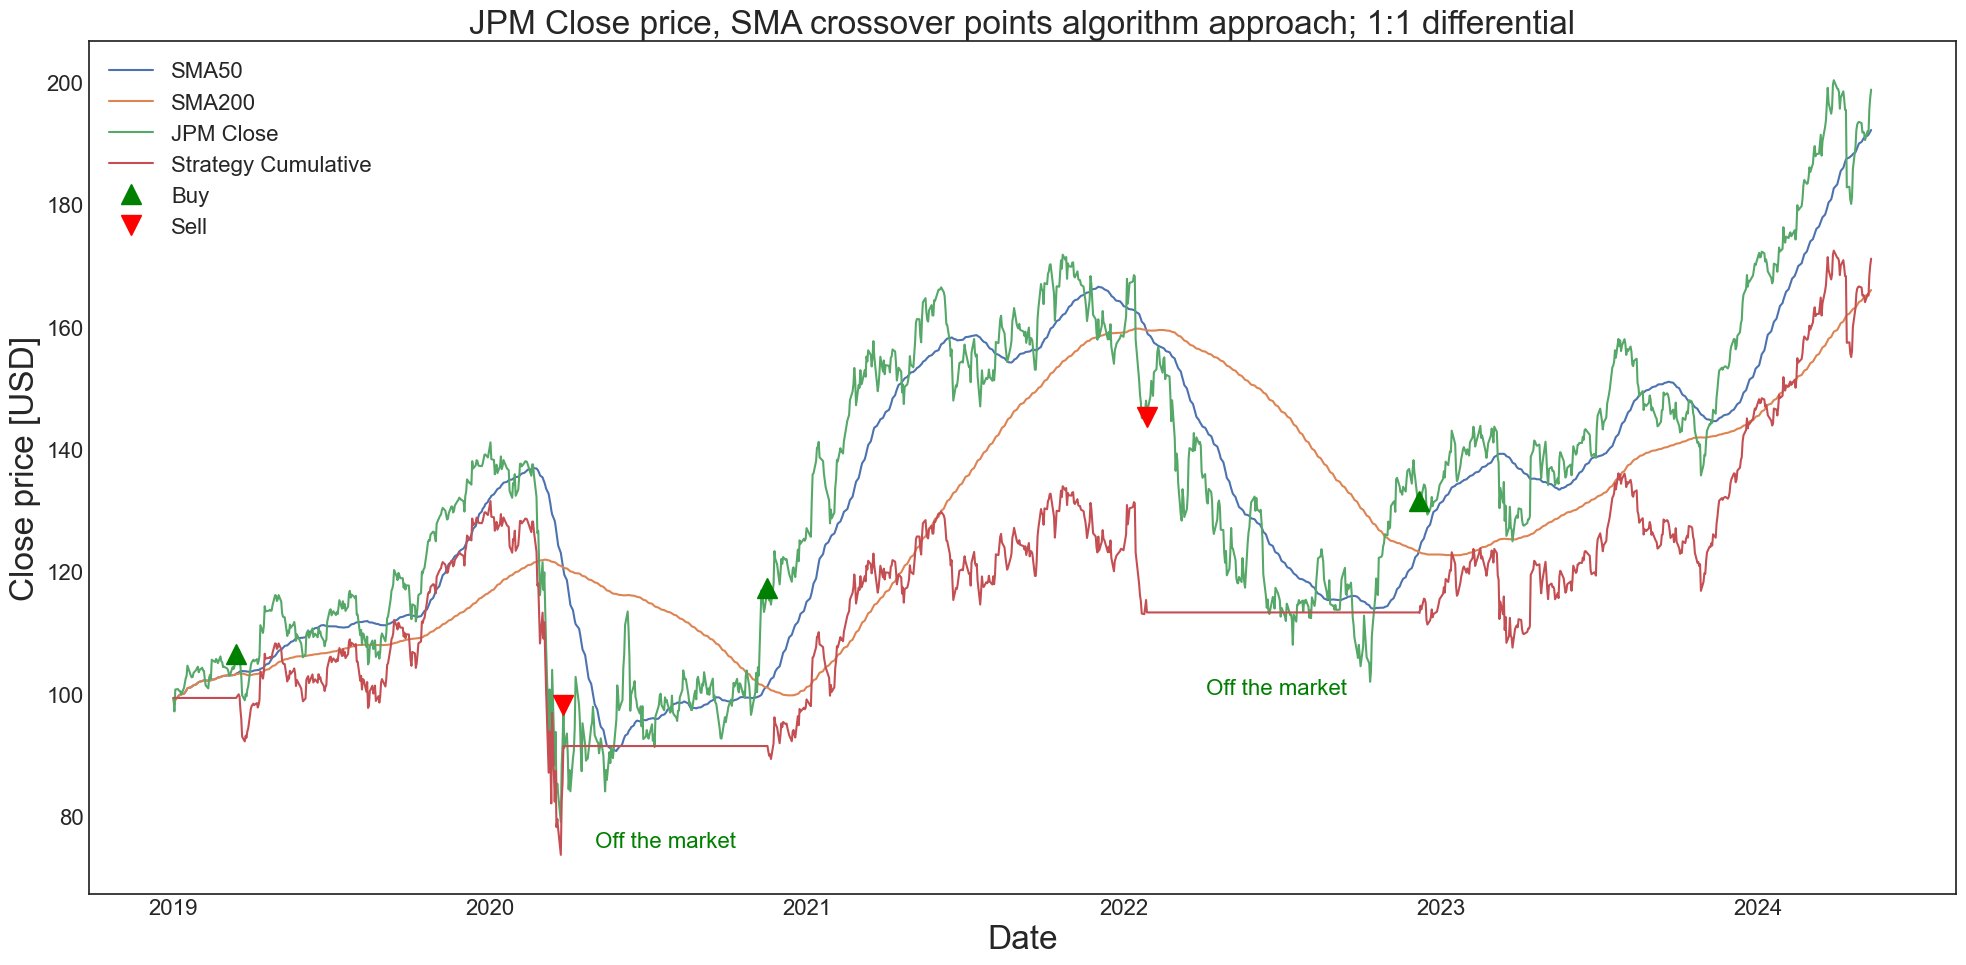

In [396]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.gca()

ax1.plot(dfCloseSMA.index, dfCloseSMA['smaShort'], label=shortWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['smaLong'], label=longWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['JPM'], label='JPM Close')
ax1.plot(dfCloseSMA.index, dfCloseSMA['StrategyCumulative'], label='Strategy Cumulative')

ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

ax1.set_xlabel('Date', fontsize=24)
ax1.set_ylabel('Close price [USD]', fontsize=24)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper left', fontsize='16')

ax1.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2020-05-01'], 75), 
    xytext=(dfCloseSMA['Date'].loc['2020-05-01'], 75),
    fontsize=16, color='green'
)
ax1.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2022-04-05'], 100), 
    xytext=(dfCloseSMA['Date'].loc['2022-04-05'], 100),
    fontsize=16, color='green'
)
plt.title('JPM Close price, SMA crossover points algorithm approach; 1:1 differential', fontsize=24)
plt.tight_layout()
plt.show()

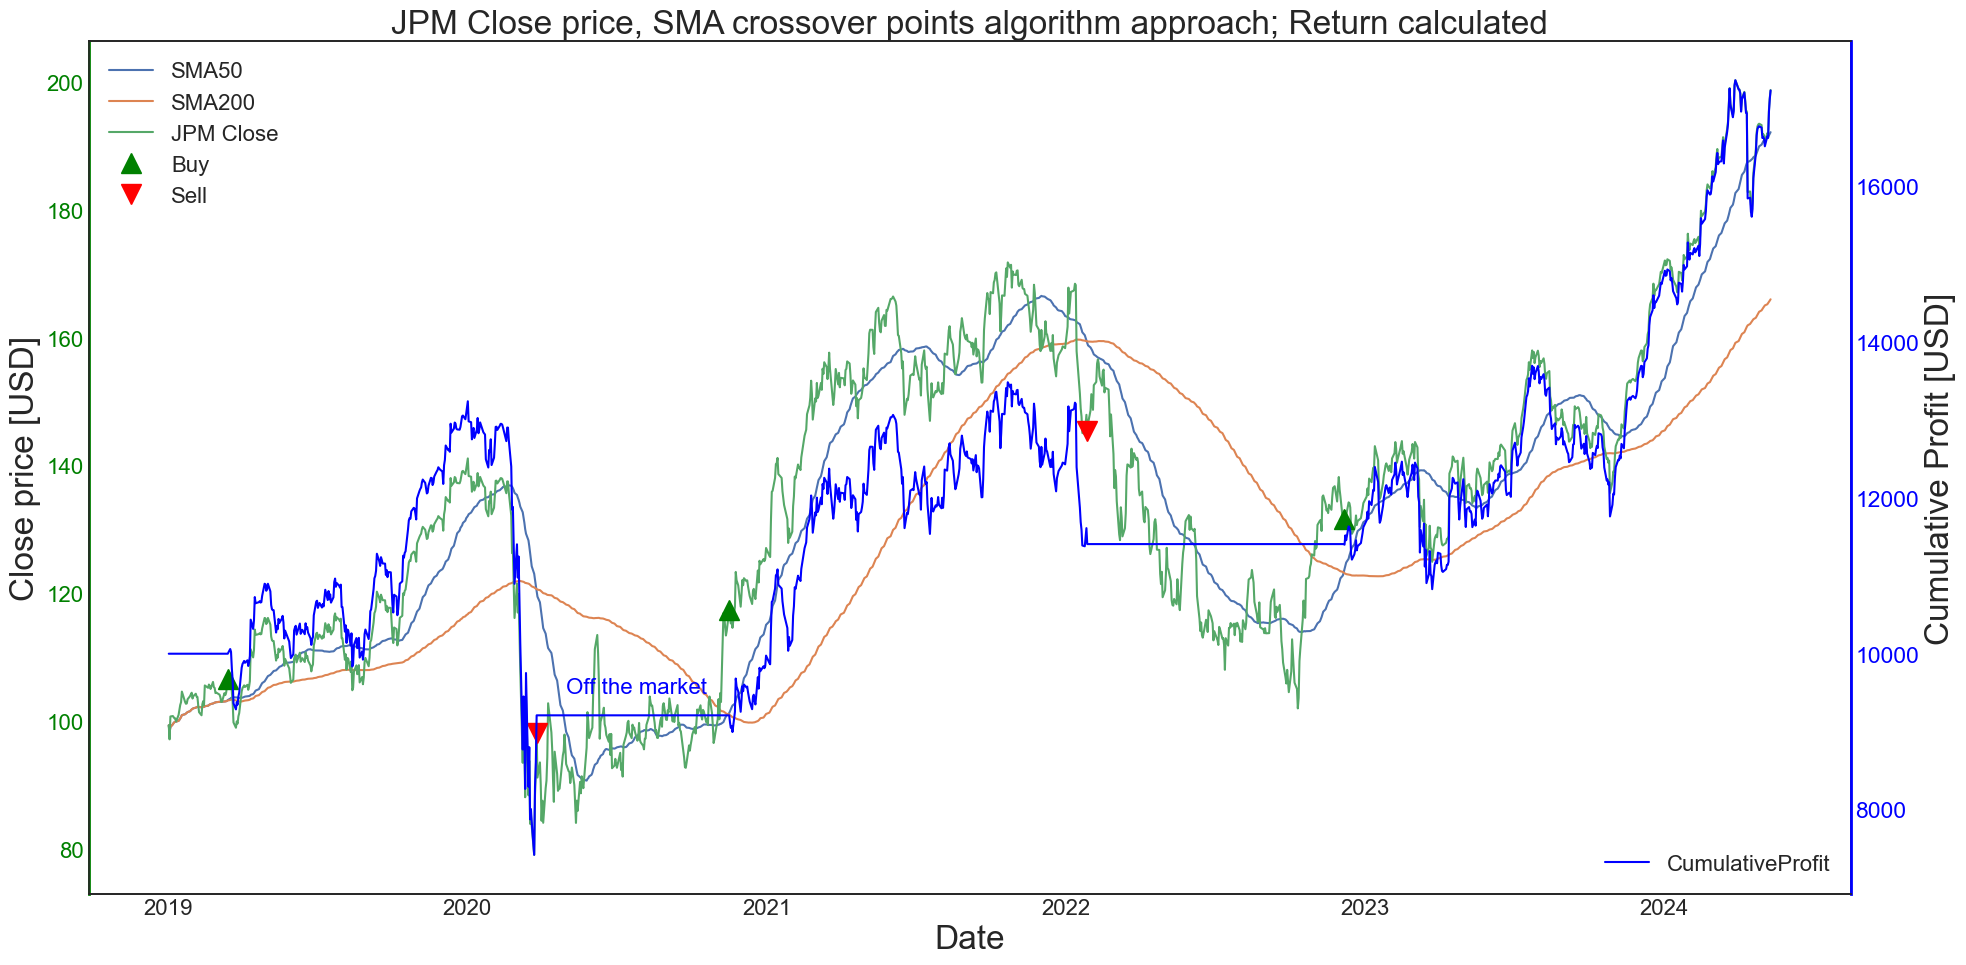

- Strategy pct. return 172.32% vs Buy and hold pct. return 200.15%

- Initial capital was 10000 USD, and cumulative profit amounted to     7231.76 USD; 
which gives a total amount equal         to 17231.76 USD


In [479]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.gca()

ax1.plot(dfCloseSMA.index, dfCloseSMA['smaShort'], label=shortWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['smaLong'], label=longWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['JPM'], label='JPM Close')

ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

ax1.set_xlabel('Date', fontsize=24)
ax1.set_ylabel('Close price [USD]', fontsize=24)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper left', fontsize='16')
ax1.spines['left'].set_color('green')
ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis='y', colors='green', width=2)

ax2 = ax1.twinx()
ax2.plot(dfCloseSMA.index, dfCloseSMA['CumulativeProfit'], label='CumulativeProfit', color='blue')
ax2.set_ylabel('Cumulative Profit [USD]', fontsize=24)
ax2.legend(loc='lower right', fontsize='16')
ax2.spines['right'].set_color('blue')
ax2.spines['right'].set_linewidth(2)
ax2.tick_params(axis='y', colors='blue', width=2)

ax2.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2020-05-01'], 9500), 
    xytext=(dfCloseSMA['Date'].loc['2020-05-01'], 9500),
    fontsize=16, color='blue'
)

plt.title('JPM Close price, SMA crossover points algorithm approach; Return calculated', fontsize=24)
plt.tight_layout()
plt.show()

buy_and_hold_pct = (dfCloseSMA['JPM'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100
strategy_pct = (dfCloseSMA['StrategyCumulative'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100

print(f"- Strategy pct. return {round(strategy_pct, 2)}% vs Buy and hold pct. return {round(buy_and_hold_pct, 2)}%")
print()
print(f"- Initial capital was {initialCapital} USD, and cumulative profit amounted to \
    {round(dfCloseSMA['CumulativeProfit'].iloc[-1] - initialCapital, 2)} USD; \nwhich gives a total amount equal \
        to {round(dfCloseSMA['CumulativeProfit'].iloc[-1], 2)} USD")

# Expotential moving average

The Exponential Moving Average (EMA) is a type of weighted moving average (WMA) that places a greater weight and significance on the most recent data points. It is commonly used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles.

**Application**

EMA is particularly popular in stock market analysis, where it helps traders and analysts track the momentum and potentially identify trends in stock prices. It's also used in economics for forecasting future trends based on historical data.

**Formula**

The formula for the Exponential Moving Average is given by:

$$
EMA_{today} = (\text{Value}_{today} \times K) + (EMA_{yesterday} \times (1 - K))
$$

where:
- $\text{Value}_{today}$ is the price or value at the current time period.
- $EMA_{yesterday}$ is the EMA from the previous period.
- $K$ is the smoothing constant, calculated as $\frac{2}{{N + 1}}$, where $N$ is the number of periods in the EMA.

This formula helps in reducing the lag by applying more weight to recent data, making the EMA quicker to react to price changes compared to the Simple Moving Average (SMA).


In [480]:
dfCloseEMA = dfClose.copy()

In [481]:
dfCloseEMA['JPMsignalMark'] = 0
dfCloseEMA['emaLong'] = dfClose['JPM'].ewm(span=200, adjust=False).mean()

dfCloseEMA['JPMsignalMark'] = np.where(dfCloseEMA['emaLong'] < dfCloseEMA['JPM'], 1, 0)
dfCloseEMA['JPMsignalMark'] = dfCloseEMA['JPMsignalMark'].diff()

initialCapital = 10000 # USD

dfCloseEMA['DailyReturns'] = dfCloseEMA['JPM'].pct_change()
dfCloseEMA['OnMarket'] = 0
dfCloseEMA.loc[dfCloseEMA['emaLong'] < dfCloseEMA['JPM'], 'OnMarket'] = 1

dfCloseEMA['OnMarketReturns'] = dfCloseEMA['DailyReturns'] * dfCloseEMA['OnMarket'].shift(1) # Transaction is set the day after signal
dfCloseEMA['CumulativeProfit'] = (1 + dfCloseEMA['OnMarketReturns']).cumprod() * initialCapital
dfCloseEMA['StrategyCumulative'] = (1 + dfCloseEMA['OnMarketReturns']).cumprod() * dfCloseEMA['JPM'].iloc[0]

dfCloseEMA.bfill(inplace=True)

# Transactions list
(dfCloseEMA.loc[(dfCloseEMA['JPMsignalMark'] == 1) | (dfCloseEMA['JPMsignalMark'] == -1)]).head()

Ticker,GS,C,BAC,MS,WFC,JPM,JPMsignalMark,emaLong,DailyReturns,OnMarket,OnMarketReturns,CumulativeProfit,StrategyCumulative
Date,,,,,,,,,,,,,
2019-01-04,175.050003,55.130001,25.580000,41.299999,47.950001,100.690002,1.0,99.302056,0.036865,1,0.000000,10000.000000,99.309998
2019-03-22,188.960007,60.980000,27.010000,41.720001,48.310001,99.760002,-1.0,101.098736,-0.030232,0,-0.030232,9907.637275,98.392743
2019-03-29,191.990005,62.220001,27.590000,42.200001,48.320000,101.230003,1.0,101.049284,0.005163,1,0.000000,9907.637275,98.392743
2019-08-14,195.559998,61.410000,26.420000,39.330002,43.970001,104.800003,-1.0,107.395342,-0.041522,0,-0.041522,10257.042203,101.862684
2019-08-16,199.419998,63.480000,27.030001,39.939999,44.389999,107.720001,1.0,107.376945,0.023954,1,0.000000,10257.042203,101.862684


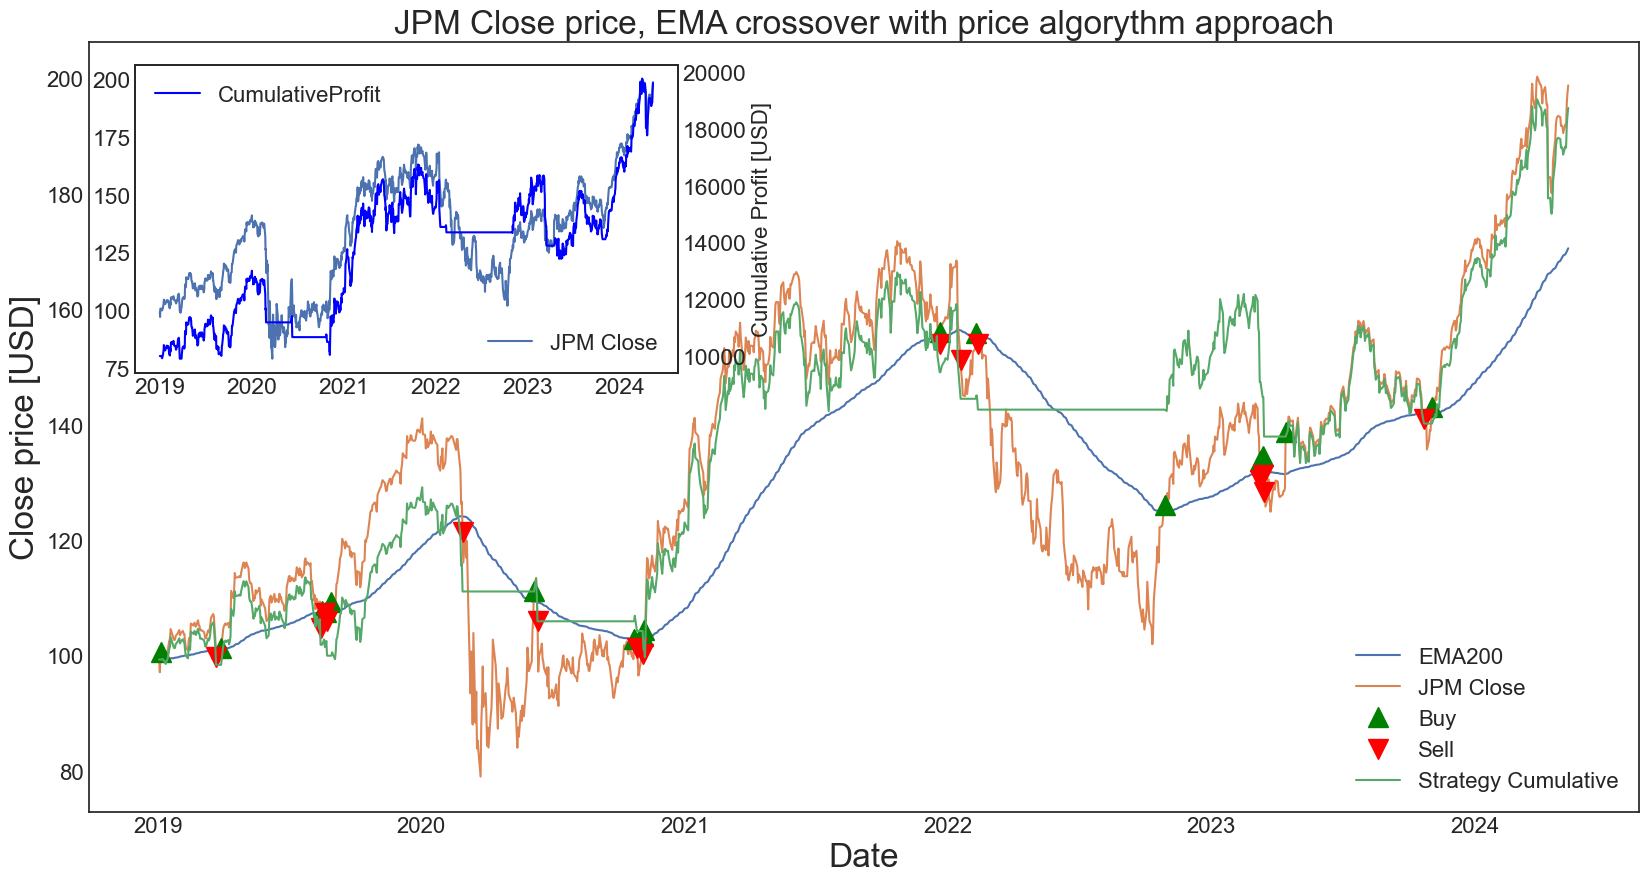

- EMA strategy pct. return 196.22% vs Buy and hold pct. return 200.15%

- Initial capital was 10000 USD, and cumulative profit amounted to     9621.69 USD; 
which gives a total amount equal         to 19621.69 USD


In [484]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(dfCloseEMA.index, dfCloseEMA['emaLong'],label='EMA200')
ax.plot(dfCloseEMA.index, dfCloseEMA['JPM'],label='JPM Close')
ax.plot(dfCloseEMA.loc[dfCloseEMA['JPMsignalMark'] == 1].index, dfCloseEMA['JPM'].loc[dfCloseEMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax.plot(dfCloseEMA.loc[dfCloseEMA['JPMsignalMark'] == -1].index, dfCloseEMA['JPM'].loc[dfCloseEMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)
ax.plot(dfCloseEMA.index, dfCloseEMA['StrategyCumulative'], label='Strategy Cumulative')

plt.title('JPM Close price, EMA crossover with price algorythm approach', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close price [USD]', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(loc='lower right', fontsize='16')

inset_ax = ax.inset_axes([0.030, 0.570, 0.350, 0.400])
inset_ax.plot(dfCloseEMA.index, dfCloseEMA['JPM'],label='JPM Close')
inset_ax2 = inset_ax.twinx()
inset_ax2.plot(dfCloseEMA.index, dfCloseEMA['CumulativeProfit'], label='CumulativeProfit', color='blue')
inset_ax2.set_ylabel('Cumulative Profit [USD]', fontsize=16)
inset_ax.legend(loc='lower right', fontsize='16')
inset_ax2.legend(loc='upper left', fontsize='16')

plt.show()

buy_and_hold_pct = (dfCloseEMA['JPM'].iloc[-1] / dfCloseEMA['JPM'].iloc[0]) * 100
strategy_pct = (dfCloseEMA['StrategyCumulative'].iloc[-1] / dfCloseEMA['JPM'].iloc[0]) * 100

print(f"- EMA strategy pct. return {round(strategy_pct, 2)}% vs Buy and hold pct. return {round(buy_and_hold_pct, 2)}%")
print()
print(f"- Initial capital was {initialCapital} USD, and cumulative profit amounted to \
    {round(dfCloseEMA['CumulativeProfit'].iloc[-1] - initialCapital, 2)} USD; \nwhich gives a total amount equal \
        to {round(dfCloseEMA['CumulativeProfit'].iloc[-1], 2)} USD")

TODO: Transactions fees - general overview